In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
sys.path.insert(0, '/home/tomek/ib_tools/')
from indicators import get_signals
from utils import chart_price, plot, perf, v_backtester, c_backtester, perf_var

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [28]:
data = pd.read_pickle('freeze/backtest/freeze_df_ESH0.pickle')

In [30]:
data.iloc[200:].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2018-12-31 21:59:00,True,2492.00,2510.00,2491.50,2509.50,2509.50,130747,2478.295662,NaN,11.589326,0.0,NaN,0.0
2018-12-31 22:00:00,True,2509.50,2513.00,2502.00,2505.75,2505.75,49413,2478.765669,NaN,11.582042,0.0,NaN,0.0
2018-12-31 22:05:00,True,2505.50,2512.75,2504.25,2508.25,2508.25,41888,2479.270131,NaN,11.543999,0.0,NaN,0.0
2019-01-02 00:02:00,False,2508.50,2517.50,2506.25,2516.00,2516.00,40287,2479.898195,NaN,11.540374,1.0,NaN,0.0
2019-01-02 03:18:00,False,2516.25,2521.25,2496.00,2497.25,2497.25,39819,2480.194734,NaN,11.709165,0.0,NaN,0.0
2019-01-02 06:31:00,False,2497.25,2499.25,2479.00,2483.25,2483.25,39276,2480.246918,NaN,11.814185,0.0,NaN,0.0
2019-01-02 09:16:00,False,2483.25,2485.75,2466.00,2466.50,2466.50,39712,2480.012247,NaN,11.911645,-1.0,NaN,-0.0
2019-01-02 10:03:00,False,2466.00,2467.00,2452.25,2460.00,2460.00,39936,2479.670807,NaN,11.946459,-1.0,NaN,-0.0
2019-01-02 11:43:00,False,2460.00,2471.25,2459.00,2465.25,2465.25,39585,2479.424897,NaN,11.950178,0.0,NaN,0.0


In [4]:
data.loc['2020-05-22 15:00:00':]

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,


In [5]:
data[data['backfill'] != True]

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2019-01-02 02:12:00,False,6353.00,6386.25,6344.00,6383.00,6383.00,12657,6351.082182,6277.576797,33.370325,0.0,1.0,0.0
2019-01-02 03:36:00,False,6383.25,6383.75,6298.50,6300.75,6300.75,12879,6334.304788,6277.971548,34.004387,0.0,1.0,0.0
2019-01-02 05:27:00,False,6301.00,6310.25,6258.75,6278.75,6278.75,12608,6315.786525,6277.984802,34.217964,-1.0,1.0,-0.0
2019-01-02 08:19:00,False,6278.50,6286.75,6252.50,6254.75,6254.75,12620,6295.441017,6277.589398,34.218354,-1.0,1.0,-0.0
2019-01-02 09:21:00,False,6254.25,6266.75,6192.25,6192.50,6192.50,13681,6261.127345,6276.142079,34.708961,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-04 21:25:00,False,6429.00,6439.25,6411.50,6417.00,6417.00,14206,6426.998247,6307.041734,29.351338,0.0,1.0,0.0
2019-01-04 21:42:00,False,6417.00,6426.25,6407.50,6419.25,6419.25,13786,6424.415498,6308.901772,29.231776,0.0,1.0,0.0
2019-01-04 21:55:00,False,6418.75,6435.50,6418.25,6430.75,6430.75,14757,6426.526999,6310.921512,29.096676,0.0,1.0,0.0


In [6]:
data.tail(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2019-01-03 21:54:00,False,6170.50,6184.25,6161.75,6167.25,6167.25,14175,6176.731045,6254.007408,31.660658,-1.0,-1.0,-1.0
2019-01-03 21:59:00,False,6167.50,6173.00,6148.50,6158.00,6158.00,20230,6170.487364,6252.410776,31.578803,-1.0,-1.0,-1.0
2019-01-03 22:10:00,False,6158.25,6182.50,6156.75,6166.25,6166.25,13507,6169.074909,6250.978041,31.512198,0.0,-1.0,0.0
2019-01-04 01:24:00,False,6166.00,6183.75,6136.50,6145.75,6145.75,14065,6161.299939,6249.228418,31.691964,-1.0,-1.0,-1.0
2019-01-04 03:16:00,False,6145.50,6179.25,6137.75,6163.75,6163.75,13790,6162.116626,6247.807311,31.803955,0.0,-1.0,0.0
2019-01-04 04:50:00,False,6164.00,6206.50,6159.00,6197.75,6197.75,13796,6173.994418,6246.975172,31.983110,0.0,-1.0,0.0
2019-01-04 07:37:00,False,6197.75,6230.00,6190.00,6225.75,6225.75,13780,6191.246278,6246.622364,32.074583,0.0,-1.0,0.0
2019-01-04 09:06:00,False,6226.50,6260.75,6224.75,6254.00,6254.00,13881,6212.164186,6246.744985,32.119355,0.0,-1.0,0.0
2019-01-04 10:22:00,False,6254.25,6257.00,6230.50,6248.50,6248.50,13810,6224.276124,6246.774152,32.055285,0.0,-1.0,0.0


/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


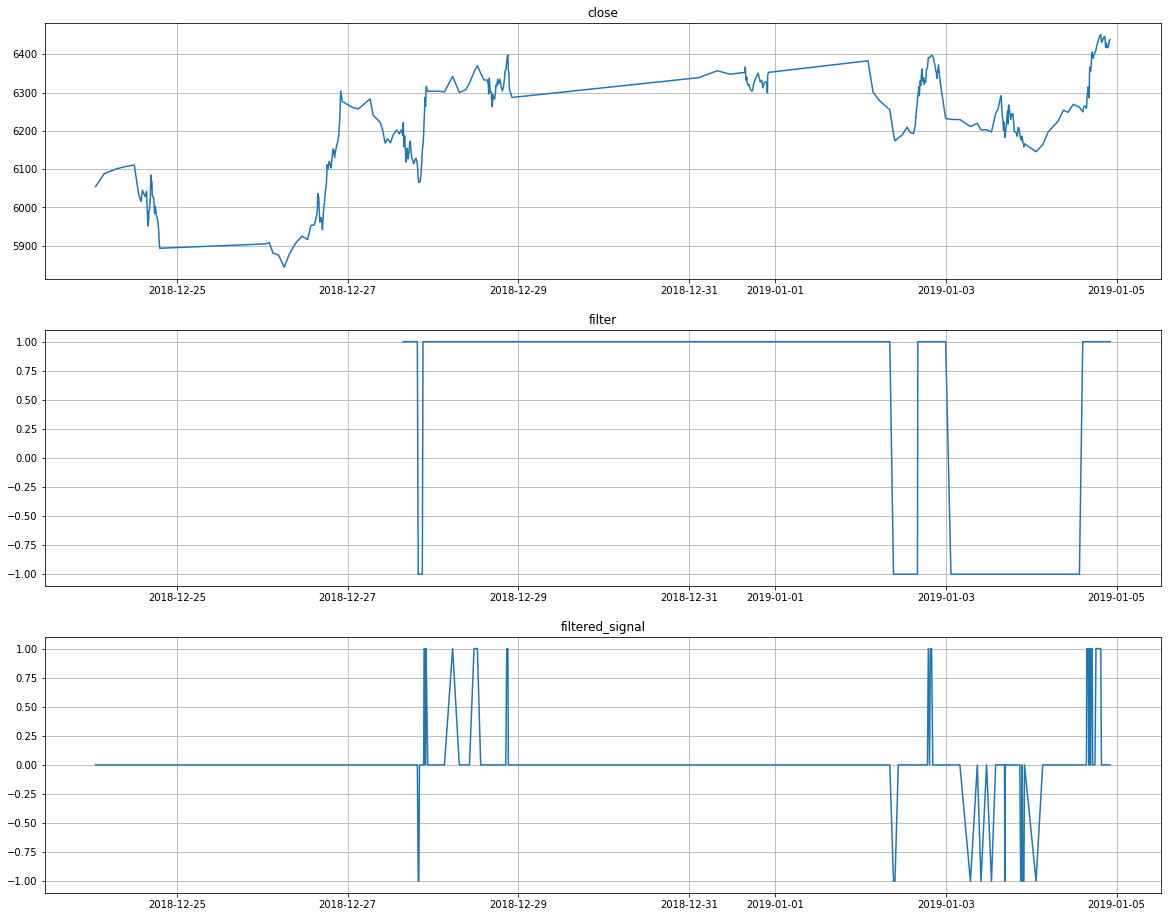

In [7]:
plot(data[['close', 'filter', 'filtered_signal']]);

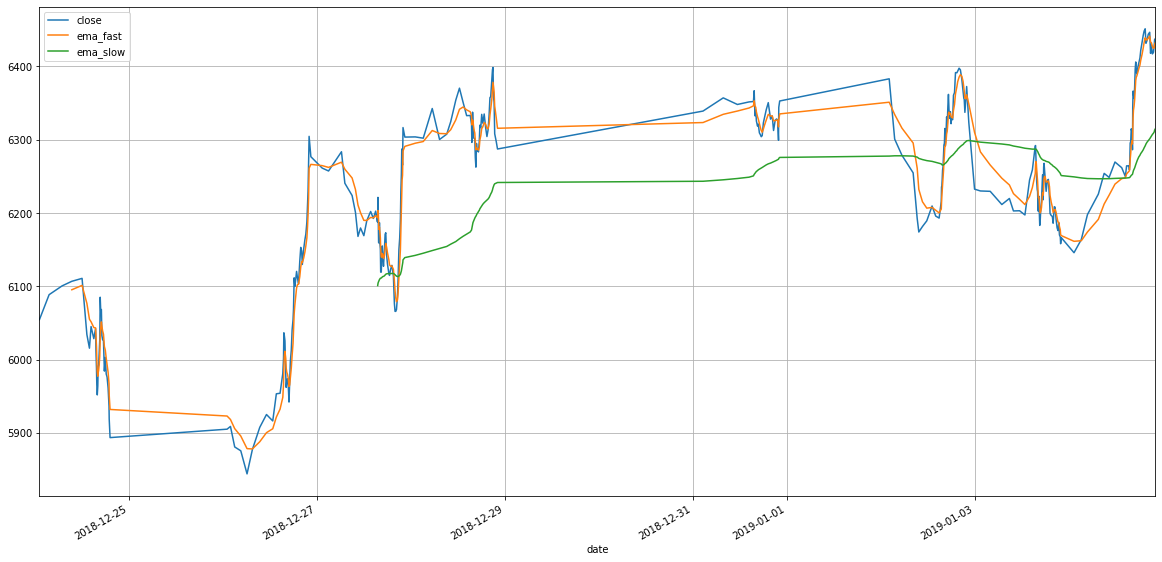

In [8]:
data[['close', 'ema_fast', 'ema_slow']].plot(figsize=(20,10), grid=True);

In [9]:
data.loc['20200228 15:00':]

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,


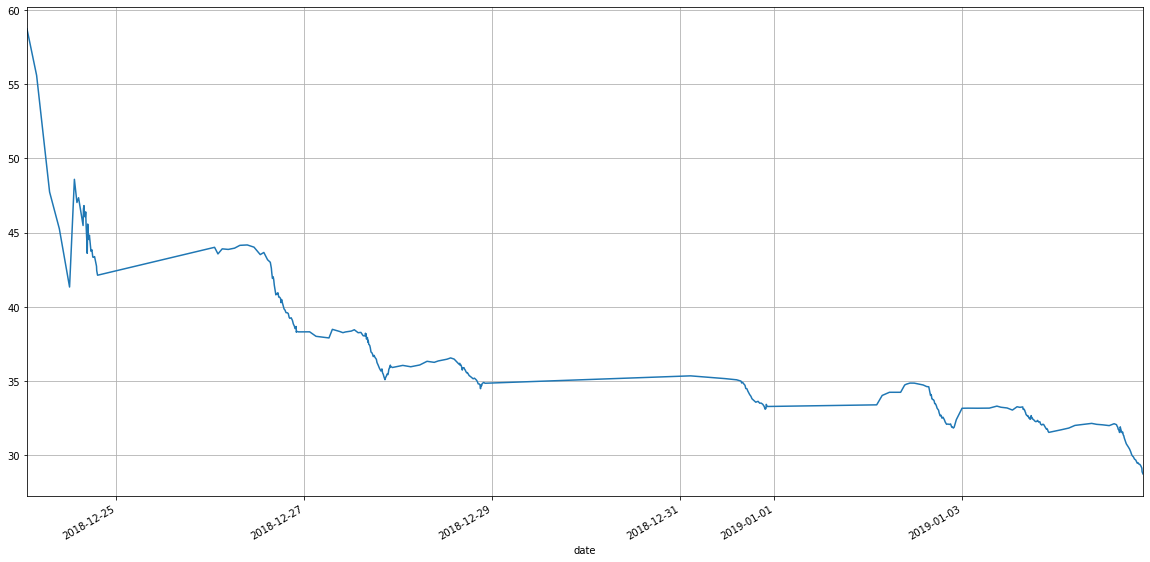

In [10]:
data['atr'].plot(figsize=(20, 10), grid=True);

In [11]:
data.loc['20180206':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2018-12-24 01:11:00,True,6049.75,6074.25,6015.50,6054.50,6054.50,12619,NaN,NaN,58.750000,0.0,NaN,0.0
2018-12-24 03:39:00,True,6054.00,6090.50,6038.00,6088.50,6088.50,12555,NaN,NaN,55.607639,0.0,NaN,0.0
2018-12-24 06:58:00,True,6089.00,6108.25,6076.00,6100.50,6100.50,12562,NaN,NaN,47.735090,0.0,NaN,0.0
2018-12-24 09:27:00,True,6100.25,6123.00,6085.00,6106.75,6106.75,12631,6095.219231,NaN,45.260605,0.0,NaN,0.0
2018-12-24 12:04:00,True,6107.00,6117.00,6091.00,6110.75,6110.75,12617,6101.181280,NaN,41.322409,0.0,NaN,0.0
2018-12-24 13:18:00,True,6111.00,6117.50,6033.75,6034.00,6034.00,12664,6076.632331,NaN,48.591545,0.0,NaN,0.0
2018-12-24 13:57:00,True,6034.25,6051.75,6013.75,6015.50,6015.50,12687,6054.988101,NaN,47.027567,0.0,NaN,0.0
2018-12-24 14:22:00,True,6015.50,6048.75,5999.25,6045.00,6045.00,12676,6051.523553,NaN,47.348772,0.0,NaN,0.0
2018-12-24 15:04:00,True,6044.50,6049.50,6011.75,6028.50,6028.50,12626,6043.644072,NaN,46.234230,0.0,NaN,0.0


In [12]:
data['long'] = data['filtered_signal'] > 0
data['short'] = data['filtered_signal'] < 0
data['out'] = data['filtered_signal'] == 0
data['long'] = data['long'] * data['price']
data['short'] = data['short'] * data['price']
data['out'] = data['out'] * data['price']
data[['long', 'short', 'out']] = data[['long', 'short', 'out']].replace({0:np.nan})
data.tail()

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2019-01-04 21:25:00,False,6429.00,6439.25,6411.50,6417.00,6417.00,14206,6426.998247,6307.041734,29.351338,0.0,1.0,0.0,NaN,NaN,6417.00
2019-01-04 21:42:00,False,6417.00,6426.25,6407.50,6419.25,6419.25,13786,6424.415498,6308.901772,29.231776,0.0,1.0,0.0,NaN,NaN,6419.25
2019-01-04 21:55:00,False,6418.75,6435.50,6418.25,6430.75,6430.75,14757,6426.526999,6310.921512,29.096676,0.0,1.0,0.0,NaN,NaN,6430.75
2019-01-04 21:59:00,False,6430.75,6437.75,6430.00,6436.50,6436.50,16364,6429.851332,6313.002987,28.856038,0.0,1.0,0.0,NaN,NaN,6436.50
2019-01-04 22:12:00,False,6436.50,6442.75,6426.75,6438.00,6438.00,13929,6432.567555,6315.074728,28.711145,0.0,1.0,0.0,NaN,NaN,6438.00


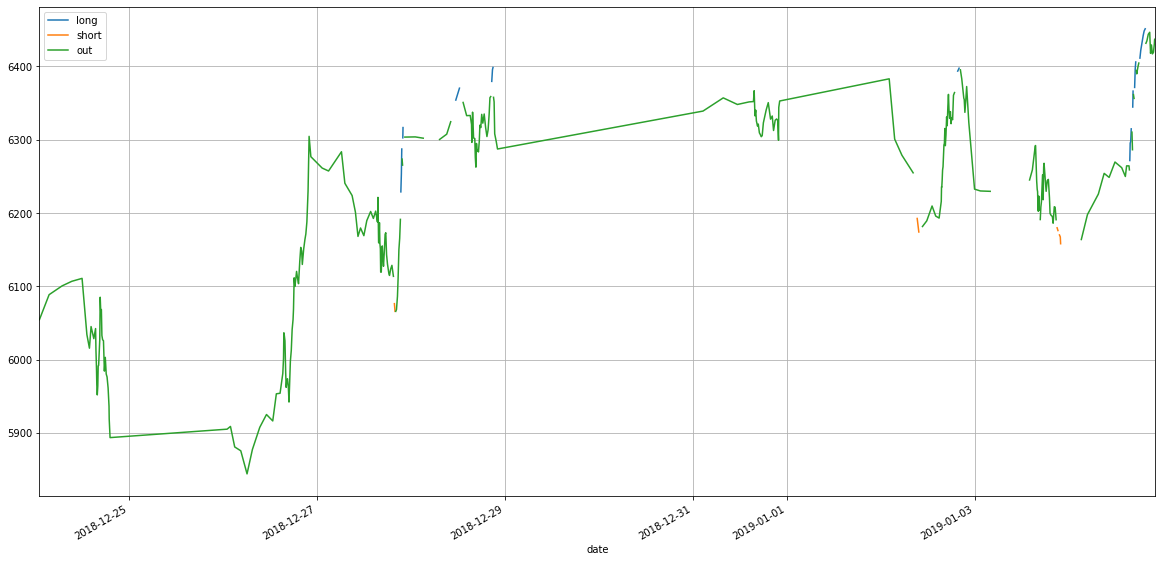

In [13]:
data[['long', 'short', 'out']].plot(figsize=(20, 10), grid=True);

In [14]:
periods = [10, 20, 40, 80, ]

In [15]:
min_max = pd.DataFrame({'close': data.price})

In [16]:
min_max

,close
date,
2018-12-24 01:11:00,6054.50
2018-12-24 03:39:00,6088.50
2018-12-24 06:58:00,6100.50
2018-12-24 09:27:00,6106.75
2018-12-24 12:04:00,6110.75
...,...
2019-01-04 21:25:00,6417.00
2019-01-04 21:42:00,6419.25
2019-01-04 21:55:00,6430.75


In [17]:
for p in periods:
    min_max[f'min_{p}'] = min_max.close.rolling(p).min()
    #min_max[f'max_{p}'] = min_max.close.rolling(p).max()

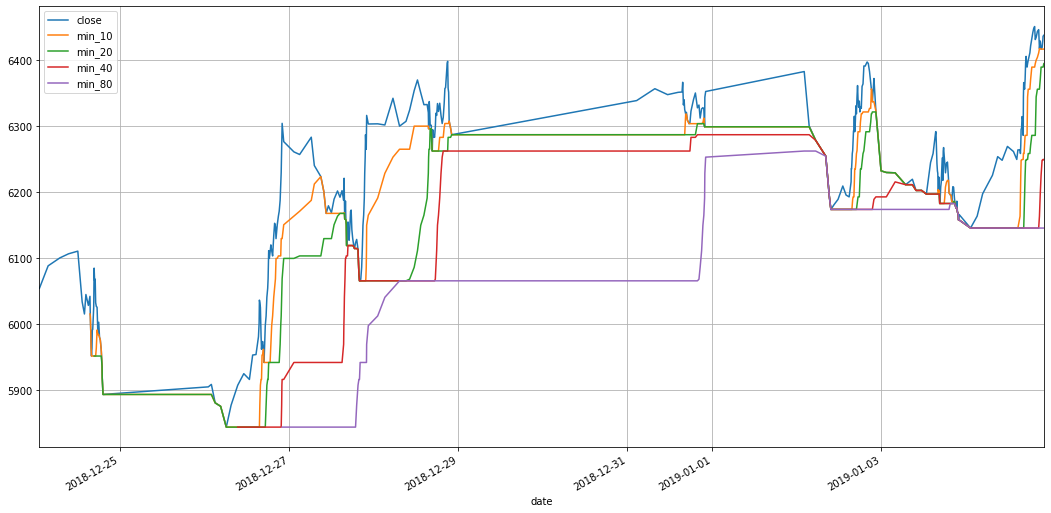

In [18]:
min_max.plot(figsize=(18, 9), grid=True);

In [19]:
data[data['signal'] != 0].loc['20190927':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,


In [20]:
data[data['signal'] != 0].tail(60)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2018-12-26 18:51:00,True,6108.50,6129.00,6099.00,6120.25,6120.25,13385,6097.574933,NaN,39.842646,1.0,NaN,0.0,NaN,NaN,6120.25
2018-12-26 19:40:00,True,6103.75,6134.75,6095.50,6134.00,6134.00,12845,6113.096277,NaN,39.585148,1.0,NaN,0.0,NaN,NaN,6134.00
2018-12-26 19:55:00,True,6134.25,6160.75,6123.50,6153.00,6153.00,12873,6126.397518,NaN,39.536959,1.0,NaN,0.0,NaN,NaN,6153.00
2018-12-26 20:59:00,True,6151.25,6167.25,6136.75,6163.75,6163.75,13318,6146.890250,NaN,39.071276,1.0,NaN,0.0,NaN,NaN,6163.75
2018-12-26 21:13:00,True,6163.75,6177.00,6150.25,6171.25,6171.25,12864,6155.010167,NaN,38.828395,1.0,NaN,0.0,NaN,NaN,6171.25
2018-12-26 21:29:00,True,6171.75,6191.00,6159.75,6187.75,6187.75,13144,6165.923445,NaN,38.680291,1.0,NaN,0.0,NaN,NaN,6187.75
2018-12-26 21:39:00,True,6188.00,6214.75,6184.50,6212.50,6212.50,13138,6181.448963,NaN,38.516925,1.0,NaN,0.0,NaN,NaN,6212.50
2018-12-26 21:47:00,True,6212.50,6244.75,6204.75,6230.00,6230.00,12652,6197.632642,NaN,38.545427,1.0,NaN,0.0,NaN,NaN,6230.00
2018-12-26 21:55:00,True,6229.75,6270.00,6225.50,6265.25,6265.25,13071,6220.171761,NaN,38.658937,1.0,NaN,0.0,NaN,NaN,6265.25


In [21]:
averages = pd.DataFrame({'price': data.price,
                       'ema_fast': data.price.ewm(span=100).mean(),
                       'ema_slow': data.price.ewm(span=160).mean()})

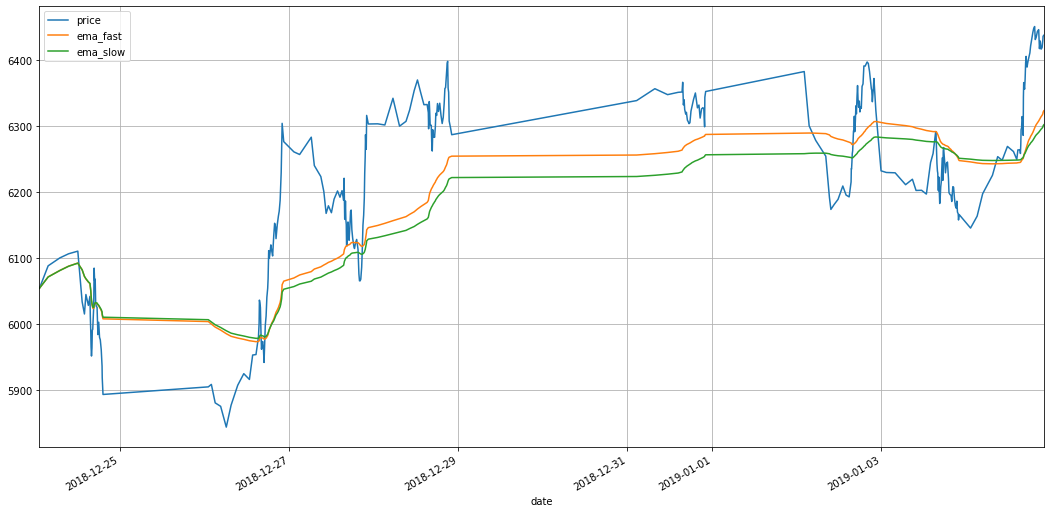

In [22]:
averages.plot(figsize=(18,9), grid=True);

In [23]:
data.loc['20180221':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2018-12-24 01:11:00,True,6049.75,6074.25,6015.50,6054.50,6054.50,12619,NaN,NaN,58.750000,0.0,NaN,0.0,NaN,NaN,6054.50
2018-12-24 03:39:00,True,6054.00,6090.50,6038.00,6088.50,6088.50,12555,NaN,NaN,55.607639,0.0,NaN,0.0,NaN,NaN,6088.50
2018-12-24 06:58:00,True,6089.00,6108.25,6076.00,6100.50,6100.50,12562,NaN,NaN,47.735090,0.0,NaN,0.0,NaN,NaN,6100.50
2018-12-24 09:27:00,True,6100.25,6123.00,6085.00,6106.75,6106.75,12631,6095.219231,NaN,45.260605,0.0,NaN,0.0,NaN,NaN,6106.75
2018-12-24 12:04:00,True,6107.00,6117.00,6091.00,6110.75,6110.75,12617,6101.181280,NaN,41.322409,0.0,NaN,0.0,NaN,NaN,6110.75
2018-12-24 13:18:00,True,6111.00,6117.50,6033.75,6034.00,6034.00,12664,6076.632331,NaN,48.591545,0.0,NaN,0.0,NaN,NaN,6034.00
2018-12-24 13:57:00,True,6034.25,6051.75,6013.75,6015.50,6015.50,12687,6054.988101,NaN,47.027567,0.0,NaN,0.0,NaN,NaN,6015.50
2018-12-24 14:22:00,True,6015.50,6048.75,5999.25,6045.00,6045.00,12676,6051.523553,NaN,47.348772,0.0,NaN,0.0,NaN,NaN,6045.00
2018-12-24 15:04:00,True,6044.50,6049.50,6011.75,6028.50,6028.50,12626,6043.644072,NaN,46.234230,0.0,NaN,0.0,NaN,NaN,6028.50
